In [1]:
import pandas as pd # import the pandas library

df = pd.read_csv('Connections.csv', skiprows=2) # import the source file and make sure it has the appropriate header information

df['Connected On'] = pd.to_datetime(df['Connected On']) # convert column to datetime values

df = (df
    .rename(columns={df.columns[0]: 'First Name'}) # give the first column a name since it is missing
    .drop(columns=['First Name', 'Last Name', 'Email Address']) # drop for privacy reasons
    .dropna(subset=['Company', 'Position']) # drop missing values in company and position
)

df.head() # show the first 5 rows of the dataframe

,Company,Position,Connected On
0,Charlestowne Hotels,Front Desk Agent,2023-04-13
1,Databricks,"Director, Strategic Accounts",2023-04-06
2,Ciphix,Teamlead Consulting,2023-03-29
3,Databricks,Manager - EMEA - Partner Solution Architects f...,2023-03-24
4,Ciphix,Teamlead Implementation | Hyperautomation,2023-03-23


In [2]:
df.info() # look at the extended data scheme to inspect the values and the date types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 1623
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company       1612 non-null   object        
 1   Position      1612 non-null   object        
 2   Connected On  1612 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 50.4+ KB


In [3]:
distinct_companies = df['Company'].nunique() # display the unique companies in the dataset
print(distinct_companies)

932


In [4]:
DeepnoteChart(df, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":"Year of connection"},"sort":"ascending","type":"ordinal","field":"Connected On","scale":{"type":"linear"},"stack":"zero","timeUnit":"year"},"y":{"axis":{"title":"Number of companies"},"sort":null,"type":"nominal","field":"Company","scale":{"type":"linear"},"stack":"zero","aggregate":"distinct"},"color":{"sort":null,"type":"nominal","field":"Company","scale":{"scheme":"set1"},"aggregate":"distinct"}}}]}],"title":"Unique number of companies by connection year","config":{"legend":{"disable":true}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [5]:
# list all the unique companies connected with in a certain year
distinct_companies = df[df['Connected On'].dt.year == 2023]['Company'].unique()
for elem in distinct_companies:
    print(f"\u2022 {elem}")

• Charlestowne Hotels
• Databricks
• Ciphix
• Siemens Digital Logistics
• Digital Sundai
• Sii Poland
• ASTEK Polska
• Strings Tech
• Seattle Data Guy


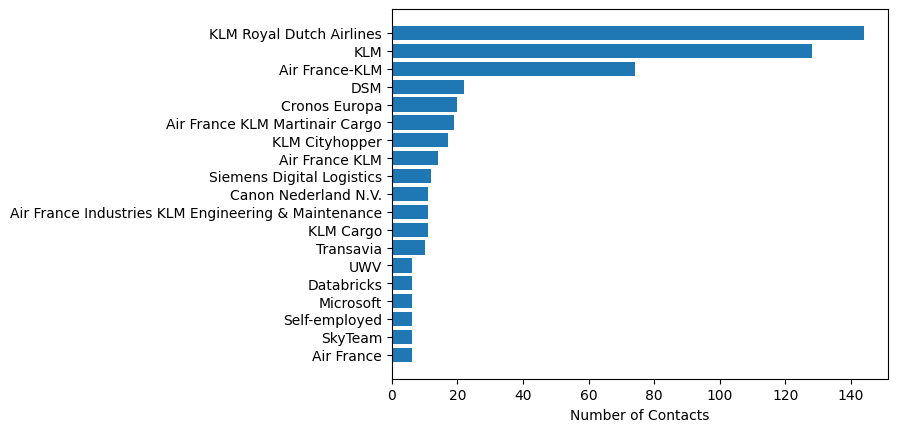

In [6]:
# import the necessary matplotlib library
import matplotlib.pyplot as plt

# set a threshold for number of connections per company 
df_filtered = df.groupby('Company').filter(lambda x: len(x) > 5)

# group the data by company and count the number of connections
connections_per_company = df_filtered.groupby('Company')['Position'].count()
contacts_per_company = connections_per_company.sort_values(ascending=True)

# create a scatter plot of the data
plt.barh(contacts_per_company.index, contacts_per_company.values)
plt.xlabel('Number of Contacts')
plt.show()

In [7]:
# create a dataframe listing the 10 Companies with most connections in my network
df_company = df['Company'].value_counts().reset_index()
df_company.columns = ['Company', 'Count']
df_company = df_company.sort_values(by="Count", ascending=False)
df_company.head(10)

,Company,Count
0,KLM Royal Dutch Airlines,144
1,KLM,128
2,Air France-KLM,74
3,DSM,22
4,Cronos Europa,20
5,Air France KLM Martinair Cargo,19
6,KLM Cityhopper,17
7,Air France KLM,14
8,Siemens Digital Logistics,12
10,KLM Cargo,11


In [8]:
import plotly.express as px #import the plotly express library

# Group the data by 'Company' and 'Position' and count the number of occurrences
company_position_counts = df.groupby(['Company', 'Position']).size().reset_index(name='Count')

# Get a list of companies with at least 3 positions
companies_with_at_least_3_positions = company_position_counts.groupby('Company')['Position'].nunique().reset_index(name='PositionCount')
companies_with_at_least_3_positions = companies_with_at_least_3_positions[companies_with_at_least_3_positions['PositionCount'] >= 3]['Company'].tolist()

# Filter the original dataframe to include only rows where the company is in the list
filtered_df = df[df['Company'].isin(companies_with_at_least_3_positions)]

# Group by 'Company' and 'Position' and count the number of occurrences
leaf_company_df = filtered_df.groupby(['Company', 'Position']).size().reset_index(name='Count')

# Create a treemap chart
fig_company = px.treemap(leaf_company_df, path=[px.Constant('My network by Company'),'Company', 'Position'], values='Count', hover_name='Company', title='My LinkedIn network')

# Display the chart
fig_company.show()


In [9]:
# create a dataframe with the 10 most frequent Positions in my network
df_position = df['Position'].value_counts().reset_index()
df_position.columns = ['Position', 'Count']
df_position = df_position.sort_values(by="Count", ascending=False)
df_position.head(10)

,Position,Count
0,Owner,23
1,Managing Partner,16
2,Project Manager,15
3,Eigenaar,15
4,Managing Director,12
5,Gepensioneerd,10
6,Retired,9
7,Directeur,8
8,Founder,8
9,Director,7


In [10]:
# group by Position and Company and count the number of occurrences
grouped_df = df.groupby(['Position', 'Company']).size().reset_index(name='Count')

# count the number of companies for each position
position_count_df = grouped_df.groupby('Position').count().reset_index()

# filter for positions that appear at least 5 times
filtered_df = position_count_df[position_count_df['Count'] >= 5]

# filter the original dataframe to only include rows with the filtered positions
filtered_leaf_position_df = filtered_df[filtered_df['Position'].isin(filtered_df['Position'])]

# create the treemap
fig_position = px.treemap(filtered_leaf_position_df, path=[px.Constant('My network by Position'),'Position', 'Company'], hover_name='Position', title='My LinkedIn network')

# display the chart
fig_position.show()

In [11]:
# import the necessary libraries for network analysis
from IPython import display
!pip install --quiet pyvis==0.3.1
from pyvis import network as net
import networkx as nx

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [12]:
# preprocess Company data to obtain a subset of only the Companies with 6 or more connections
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['Count']>=6]
print(df_company_reduced.shape)

(932, 2)
(19, 2)


In [13]:
# preprocess Position data to obtain a subset of only the Positions that occur 6 times or more
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['Count']>=6]
print(df_position_reduced.shape)

(1367, 2)
(14, 2)


In [14]:
# import the necessary helpers
from IPython.display import HTML
nt = net.Network(notebook=True)

# initialize graph
g = nx.Graph()

# use iterrows tp iterate through the dataframe
for _, row in df_company_reduced.iterrows():

    # store company name and count
    company = row['Company']
    count = row['Count']

    title = f"<b>{company}</b> – {count}"
    positions = set([x for x in df[company == df['Company']]['Position']])
    positions = ''.join('<li>{}</li>'.format(x) for x in positions)

    position_list = f"<ul>{positions}</ul>"
    hover_info = title + position_list

    g.add_node(company, size=count/2, title=hover_info, color='#EC6A02')
    g.add_edge('THIS IS ME', company, color='grey')

# generate the graph
nt = net.Network(height='1000px', width='1200px', bgcolor='#003F68', font_color='white', notebook=True)
nt.from_nx(g)

# display the graph
nt.show('Company_graph.html')
HTML('Company_graph.html')


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [15]:
# initialize graph
g = nx.Graph()

# use iterrows tp iterate through the dataframe
for _, row in df_position_reduced.iterrows():

  count = f"{row['Count']}"
  position= row['Position']
  
  g.add_node(position, size=count, color='#EC6A02', title=count)
  g.add_edge('This is me', position, color='grey')

# generate the graph
nt = net.Network(height='1000px', width='1000px', bgcolor='#003F68', font_color='white', notebook =True)
nt.from_nx(g)

# display the graph
nt.show('Position_graph.html')
HTML('Position_graph.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [16]:
Position_1 = 'Founder'

In [17]:
Position_2 = ''

In [18]:
df_2 = _deepnote_execute_sql('SELECT * FROM df WHERE Position LIKE {{\'%\'+Position_1+\'%\'}} AND Position LIKE {{\'%\'+Position_2+\'%\'}};', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_2

,Company,Position,Connected On
0,Strings Tech,Co-Founder,2023-01-15
1,EpicAi,Co-Founder,2022-09-01
2,Mountain Platform,Co-Founder | Azure Data & Platform Engineer,2022-05-25
3,Cloubis,Managing Partner / Co-Founder,2022-05-17
4,Agiliz,Founder & Managing Partner,2022-04-21
5,Raccoons Group,Co-Founder,2022-04-05
6,Brainjar,Founder & Managing Partner,2022-03-31
7,ReBatch,Founder,2022-03-31
8,Cloubis,Managing Partner / Co-Founder,2022-03-17
9,The Wine & Food Academy,Founder,2022-03-15


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=523e8586-9fa0-4cf2-902c-567f1c9d087e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>